## **TP2** 

## Import BIB

In [31]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [35]:
def load_data(chemin):
   try:
      data = pd.read_csv(chemin , sep=',' )
      return data
   except Exception as e:
      print(f"Une erreur s'est produite : {e}")

In [36]:
chemin_data = '..//DATA//DatasetExos.csv'
data = load_data(chemin_data)

In [37]:
data.head(10)

,ep (ms),Acc_x,Acc_y,Acc_z,Gyro_x,Gyro_y,Gyro_z,ID,Exercise,Category,Set
0,2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,30.0
1,2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,30.0
2,2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,30.0
3,2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,30.0
4,2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,30.0
5,2019-01-11 15:08:06.200,-0.026000,0.965000,-0.118000,0.4634,5.2194,-6.4636,B,bench,heavy,30.0
6,2019-01-11 15:08:06.400,-0.048667,0.790000,-0.145333,21.6950,8.1708,-28.2196,B,bench,heavy,30.0
7,2019-01-11 15:08:06.600,-0.170000,0.899500,-0.250000,17.5246,1.5976,-17.5854,B,bench,heavy,30.0
8,2019-01-11 15:08:06.800,-0.222667,0.907000,-0.204333,-7.2318,-1.3536,-0.4026,B,bench,heavy,30.0
9,2019-01-11 15:08:07.000,-0.204500,0.930000,-0.149000,-28.6830,-10.2076,20.5732,B,bench,heavy,30.0


## Scatter Plot

In [38]:
def generate_ScatterPlot(data , att1 , att2):
    print(data.shape)
    title = f'Scatter plot de {att2} en fonction de {att1}.'
    plt.scatter(data[att1],data[att2], color='red')
    plt.title(title , fontsize=13)
    plt.xlabel(att1)
    plt.ylabel(att2)
    plt.show()

(9009, 11)
0    0.013500
1   -0.001500
2    0.001333
3   -0.024000
4   -0.028000
Name: Acc_x, dtype: float64
0    0.977000
1    0.970500
2    0.971667
3    0.957000
4    0.957667
Name: Acc_y, dtype: float64


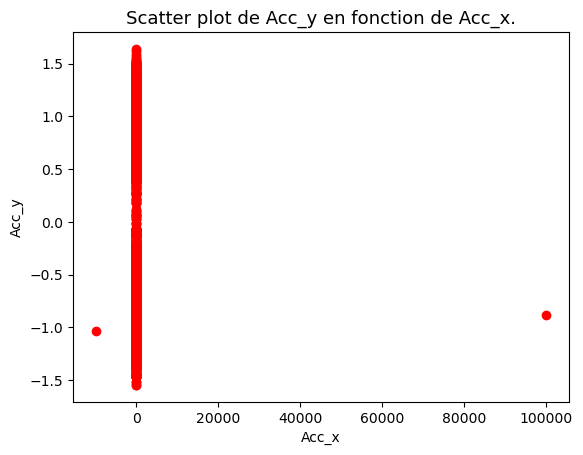

In [39]:
generate_ScatterPlot(data ,'Acc_x' , 'Acc_y')

In [44]:
filtred_data = data[(data['Acc_x'] <= 2000) & (data['Acc_x'] >= -1000)]

(9003, 11)
0    0.013500
1   -0.001500
2    0.001333
3   -0.024000
4   -0.028000
Name: Acc_x, dtype: float64
0    0.977000
1    0.970500
2    0.971667
3    0.957000
4    0.957667
Name: Acc_y, dtype: float64


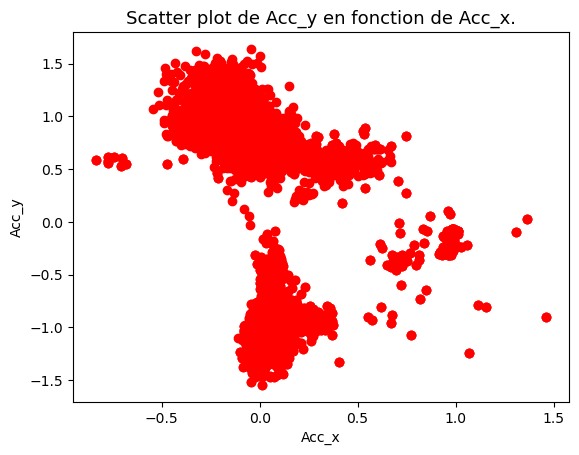

In [45]:
generate_ScatterPlot(filtred_data ,'Acc_x' , 'Acc_y')

## Histogram

In [47]:
def generate_histogram(df, attribute):
    # Generates a histogram for a numerical attribute from a DataFrame.
    plt.hist(df[attribute], bins=10, color='blue', edgecolor='black', alpha=0.7)
    
    plt.title("Histogram", fontsize=14)
    plt.xlabel(attribute, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    
    plt.show()

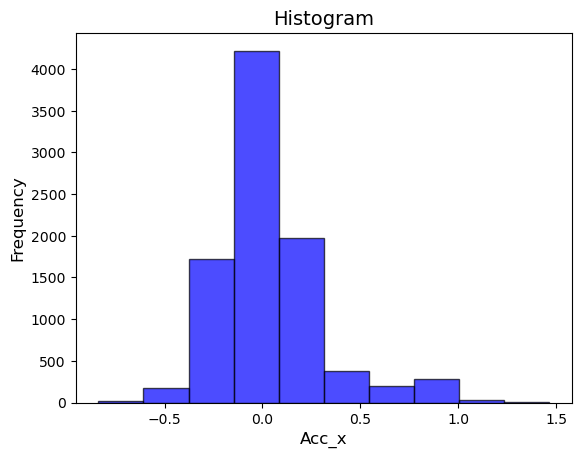

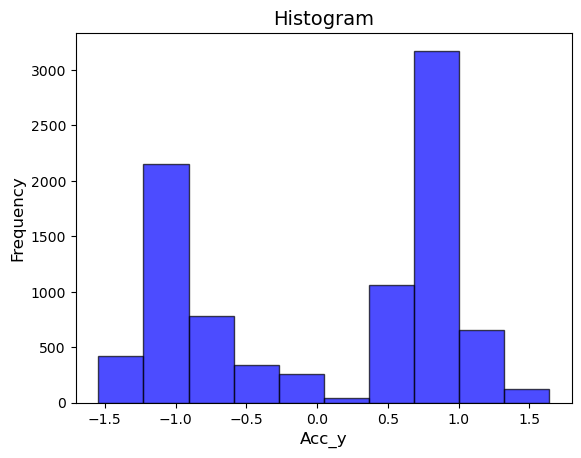

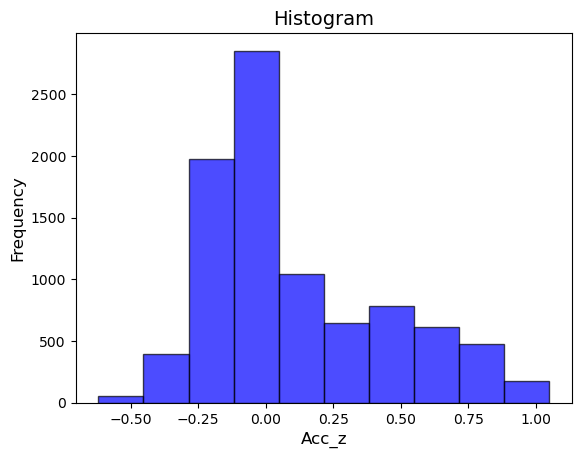

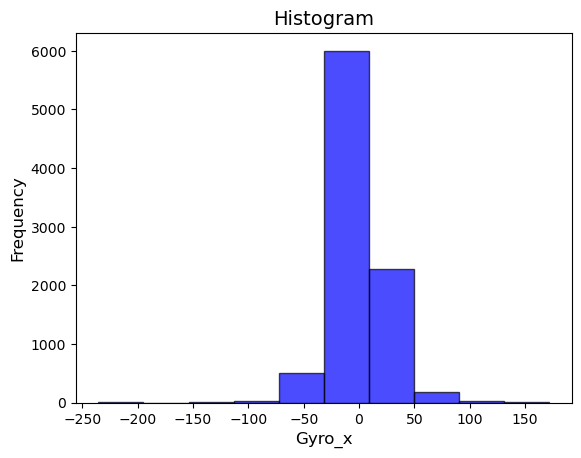

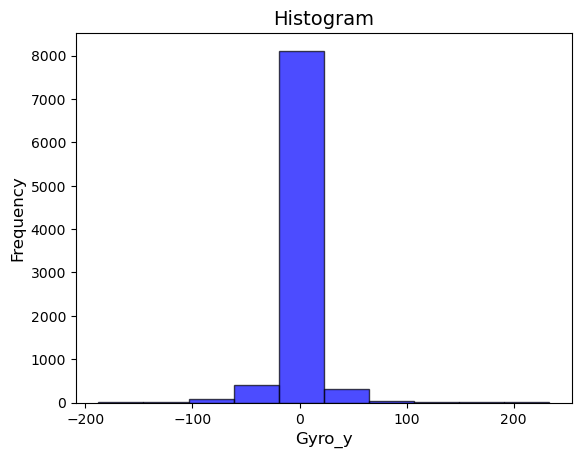

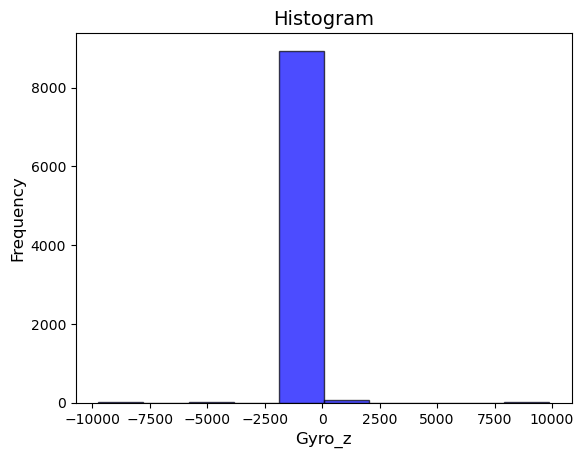

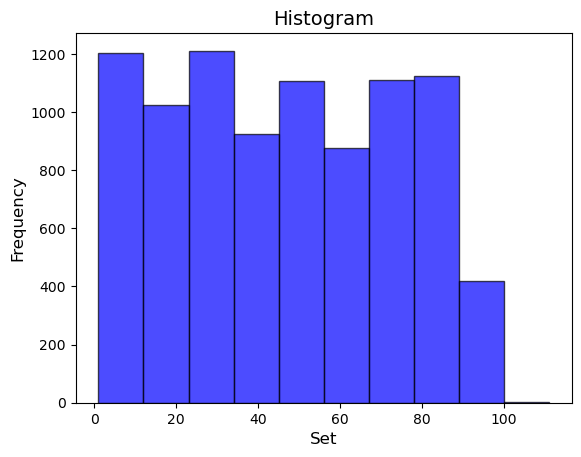

In [49]:
generate_histogram(filtred_data, "Acc_x")
generate_histogram(data, "Acc_y")
generate_histogram(data, "Acc_z")

generate_histogram(data, "Gyro_x")
generate_histogram(data, "Gyro_y")
generate_histogram(data, "Gyro_z")

generate_histogram(data, "Set")

## Bar Chart

In [50]:
def generate_bar_chart(df, attribute):
    #Generates a bar chart for a categorical attribute from a DataFrame.
    #     
    counts = df[attribute].value_counts()
    
    plt.bar(counts.index, counts.values, color='green', edgecolor='black', alpha=0.7)
    
    plt.title("Bar Chart", fontsize=14)
    plt.xlabel(attribute, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    
    # Rotate the x-axis labels if needed (for better readability)
    plt.xticks(rotation=45, ha='right')
    
    # Show the plot
    plt.show()


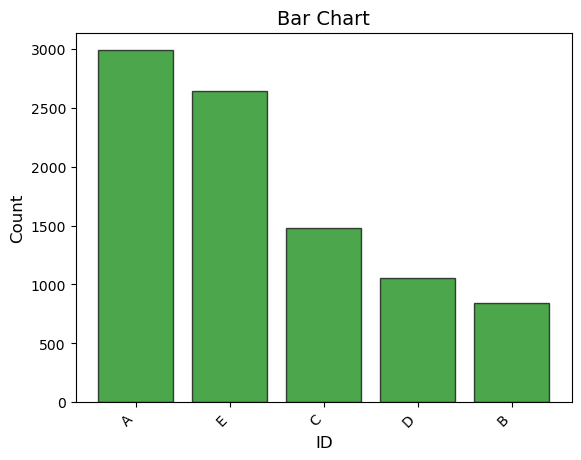

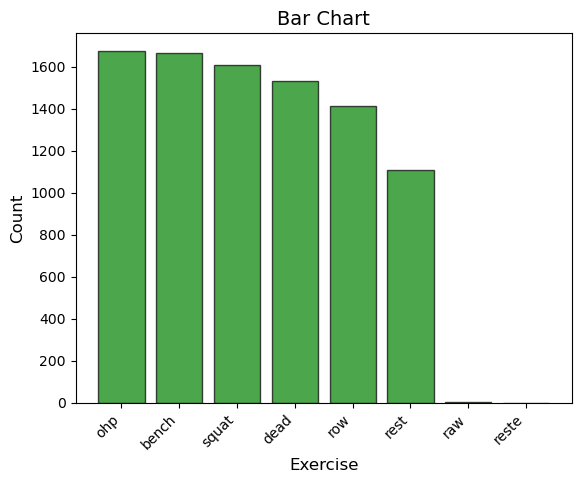

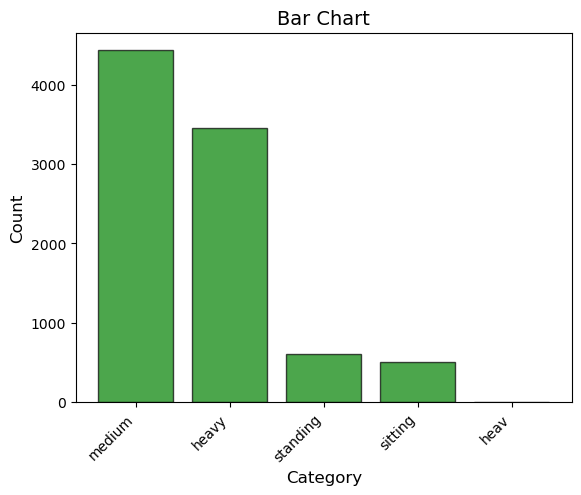

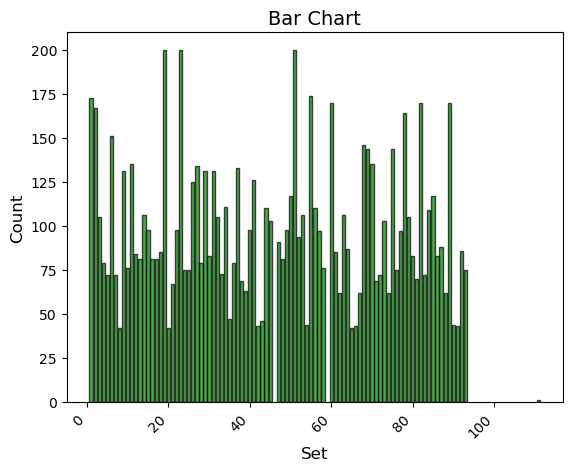

In [51]:
generate_bar_chart(data, "ID")
generate_bar_chart(data, "Exercise")
generate_bar_chart(data, "Category")
generate_bar_chart(data, "Set")

## Box plot

In [52]:
def generate_box_plots(df, attributes, show_outliers=True):

    plt.boxplot([df[attribute] for attribute in attributes],
                vert=True, #Orientation of the box plot = vertical (False is horizental)
                patch_artist=True, # Enables filling the box with color.
                showfliers=show_outliers,
                boxprops=dict(facecolor='lightblue', color='black'), 
                medianprops=dict(color='red'), 
                whiskerprops=dict(color='black'),
                capprops=dict(color='orange'))
    
    # Add title and labels
    plt.title("Box Plots", fontsize=14)
    plt.ylabel("Values", fontsize=12)
    plt.xticks(range(1, len(attributes) + 1), attributes, rotation=45, ha='right')  # Set x-ticks to column names
    
    # Show the plot
    plt.show()

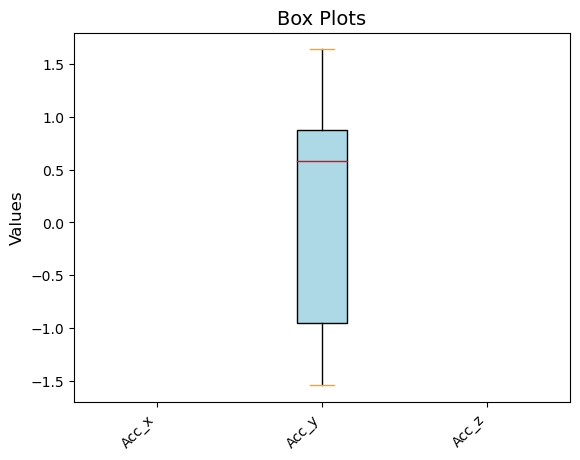

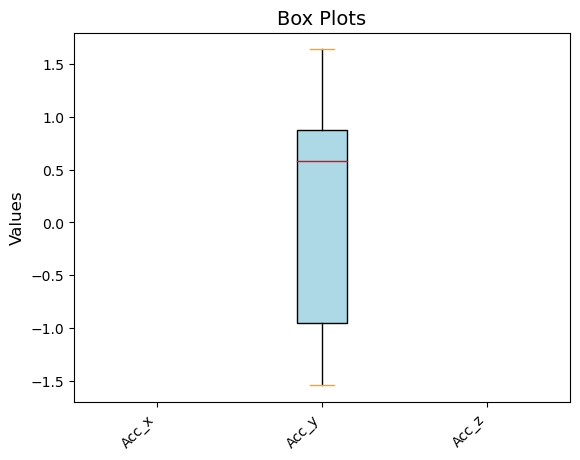

In [53]:
generate_box_plots(data, ['Acc_x', 'Acc_y', 'Acc_z'], show_outliers=True)
generate_box_plots(data, ['Acc_x', 'Acc_y', 'Acc_z'], show_outliers=False)